In [1]:
import pandas as pd

In [2]:
import pandas as pd

# Load dataset
data = pd.read_csv('zoo.csv')  # replace with your dataset file path
data.head()  # preview first few rows
data.info()  # check column types and missing values
data.describe()  # summary statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [3]:
# Check missing values
print(data.isnull().sum())


animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


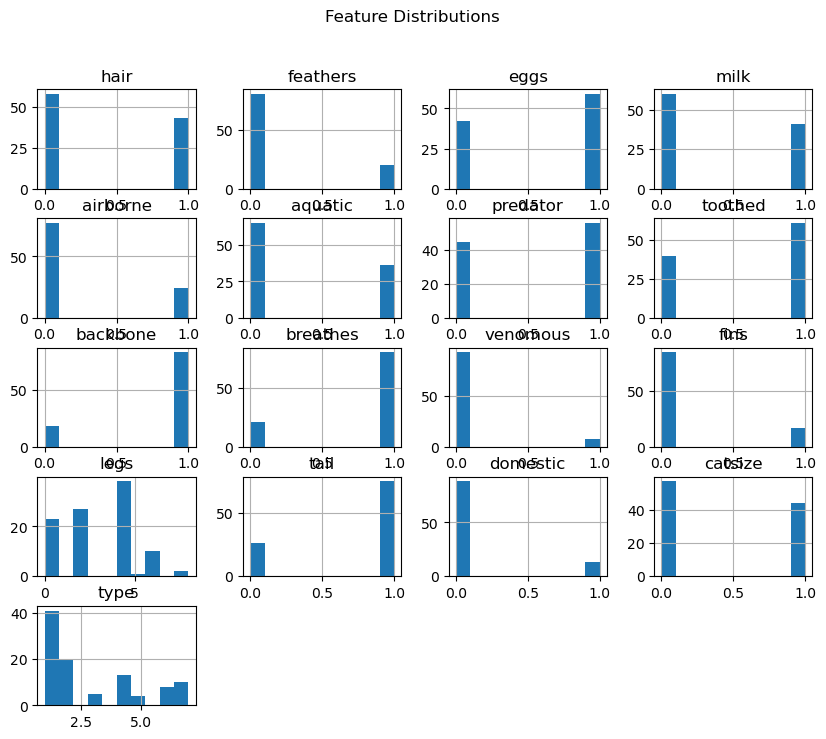

In [4]:
import matplotlib.pyplot as plt

# Plot histograms for all numerical features
data.hist(figsize=(10,8))
plt.suptitle("Feature Distributions")
plt.show()


In [9]:
print(data.columns)


Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')


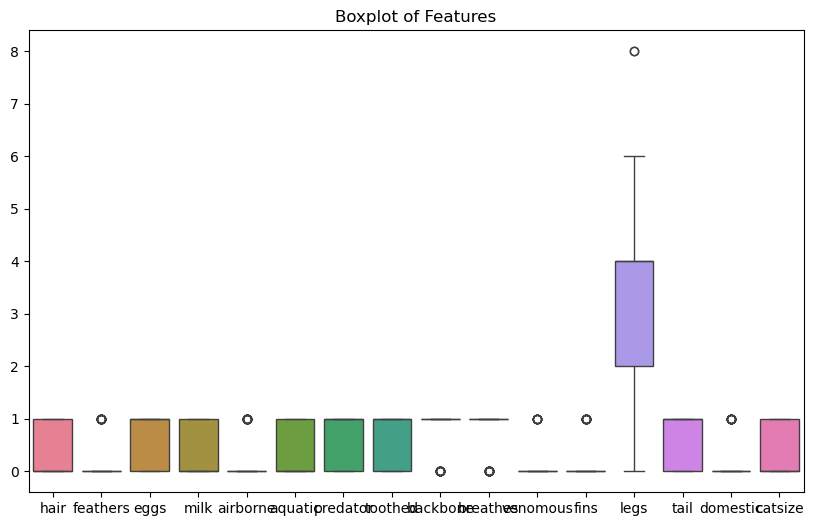

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=data.drop(columns=['type']))  # drop the target column 'type'
plt.title("Boxplot of Features")
plt.show()


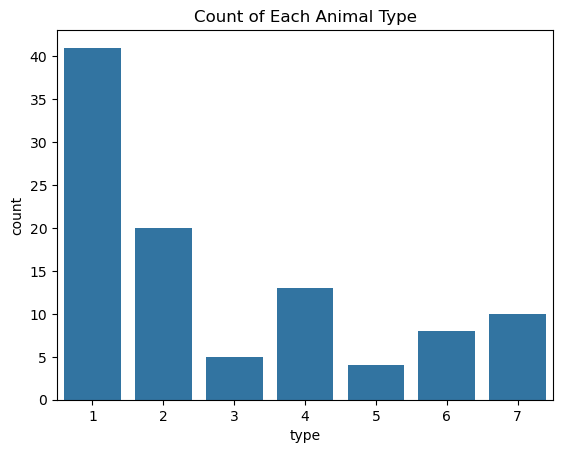

In [12]:
sns.countplot(x='type', data=data)
plt.title("Count of Each Animal Type")
plt.show()


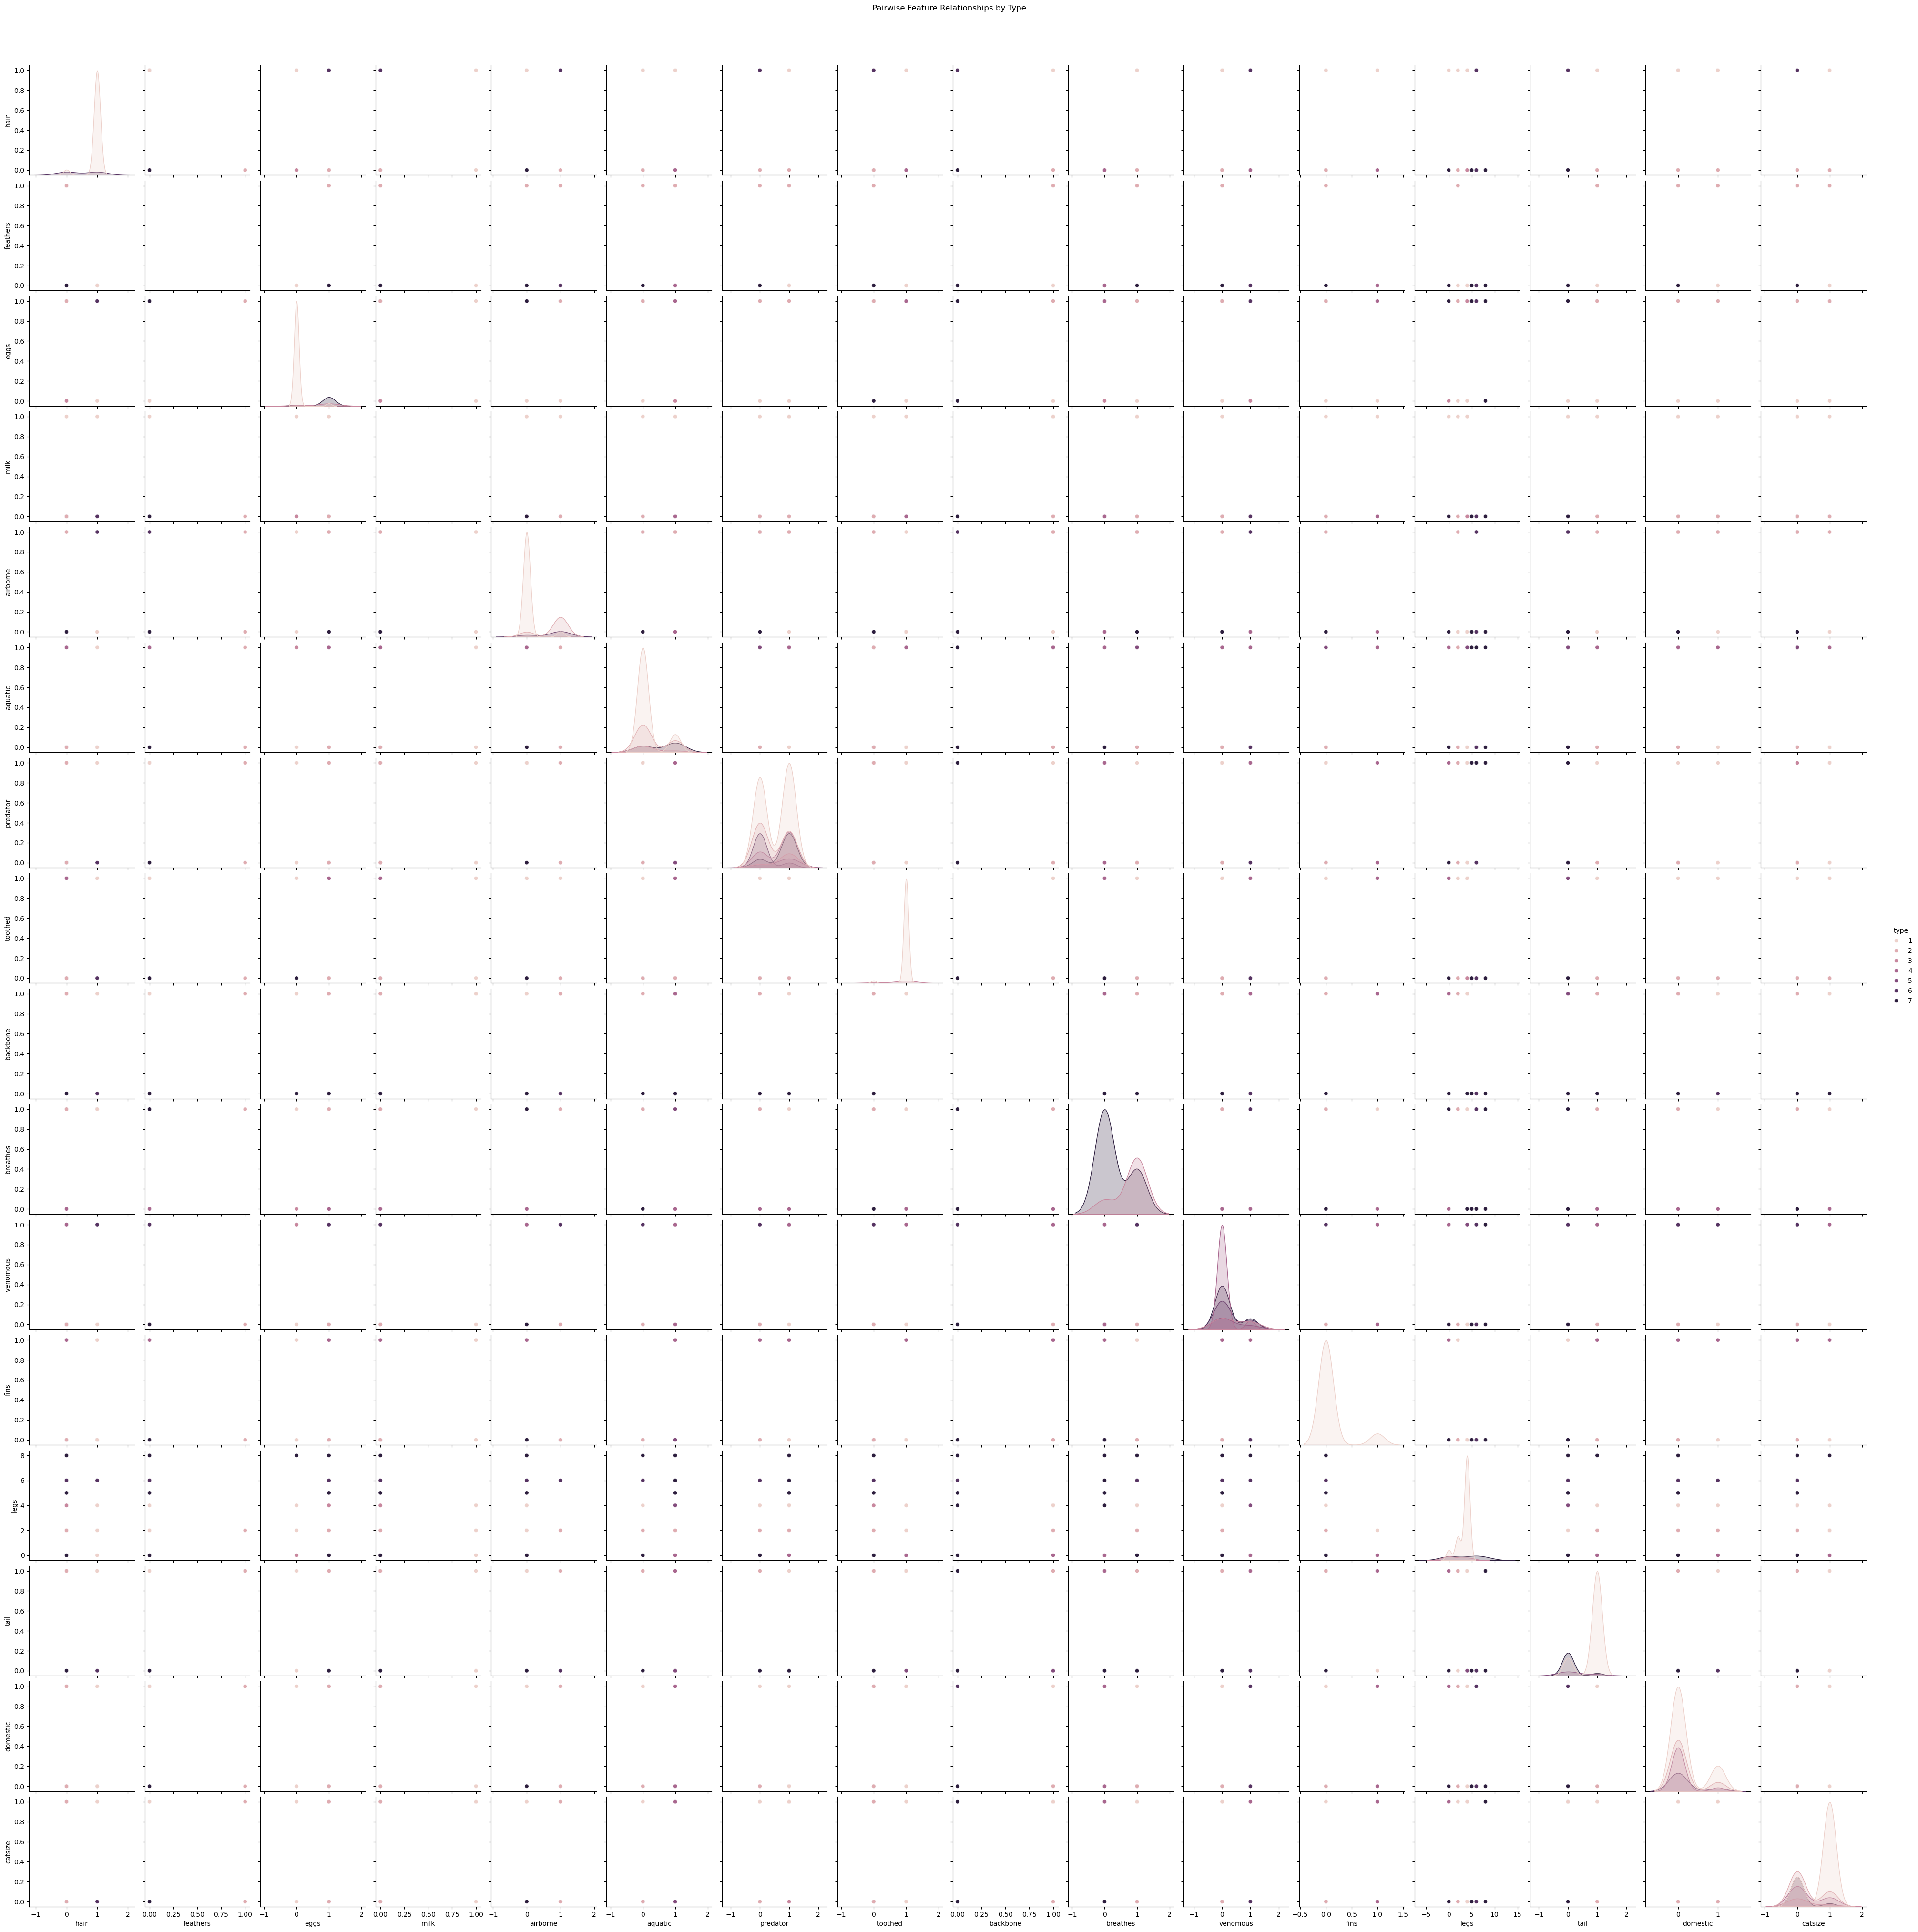

In [14]:
sns.pairplot(data, hue='type')
plt.suptitle("Pairwise Feature Relationships by Type", y=1.02)
plt.show()


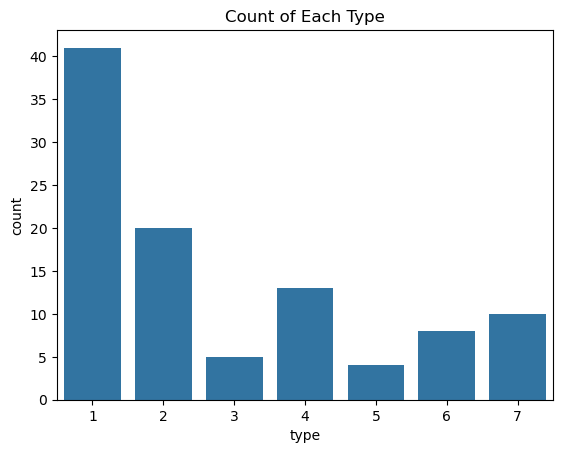

In [16]:
sns.countplot(x='type', data=data)
plt.title("Count of Each Type")
plt.show()


In [17]:
# Check for missing values
print(data.isnull().sum())


animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [19]:
# Select all numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", numeric_cols)


Numeric columns: Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')


In [20]:
import numpy as np

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < Q1 - 1.5*IQR) | (data[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")


hair: 0 outliers
feathers: 20 outliers
eggs: 0 outliers
milk: 0 outliers
airborne: 24 outliers
aquatic: 0 outliers
predator: 0 outliers
toothed: 0 outliers
backbone: 18 outliers
breathes: 21 outliers
venomous: 8 outliers
fins: 17 outliers
legs: 2 outliers
tail: 0 outliers
domestic: 13 outliers
catsize: 0 outliers
type: 0 outliers


In [21]:
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data = data[~((data[col] < Q1 - 1.5*IQR) | (data[col] > Q3 + 1.5*IQR))]


In [23]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable 'type'
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])


In [24]:
data.drop('animal name', axis=1, inplace=True)


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = data.drop('type', axis=1)
y = data['type']

X_scaled = scaler.fit_transform(X)


In [26]:
from sklearn.model_selection import train_test_split


In [27]:
# Features (all columns except target)
X = data.drop('type', axis=1)

# Target variable
y = data['type']


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [29]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Optional: check class distribution
print("Training set class counts:\n", y_train.value_counts())
print("Testing set class counts:\n", y_test.value_counts())


Training set size: (16, 16)
Testing set size: (5, 16)
Training set class counts:
 type
0    16
Name: count, dtype: int64
Testing set class counts:
 type
0    5
Name: count, dtype: int64


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [34]:
# Initialize KNN classifier
# n_neighbors is k, you can start with k=5
knn = KNeighborsClassifier(n_neighbors=5)


In [35]:
knn.fit(X_train, y_train)  # X_train and y_train from your train/test split


KNeighborsClassifier()

In [36]:
# Predictions on training data (to check for overfitting)
y_train_pred = knn.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

# Predictions on test data
y_test_pred = knn.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))


Training Accuracy: 1.0
Testing Accuracy: 1.0


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # <- ensures all classes are represented
)


In [41]:
print(y.value_counts())


type
0    21
Name: count, dtype: int64


In [42]:
from sklearn.model_selection import train_test_split

# Check unique classes
print("Unique classes:", y.unique())

# Split without stratify if very small dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Check distribution in train/test
print("Training classes:\n", y_train.value_counts())
print("Testing classes:\n", y_test.value_counts())


Unique classes: [0]
Training classes:
 type
0    16
Name: count, dtype: int64
Testing classes:
 type
0    5
Name: count, dtype: int64


In [44]:
print("Original class counts:\n", y.value_counts())
print("Training class counts:\n", y_train.value_counts())
print("Testing class counts:\n", y_test.value_counts())


Original class counts:
 type
0    21
Name: count, dtype: int64
Training class counts:
 type
0    16
Name: count, dtype: int64
Testing class counts:
 type
0    5
Name: count, dtype: int64


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,  # increase test size
    random_state=42,
    stratify=y       # maintain class distribution
)


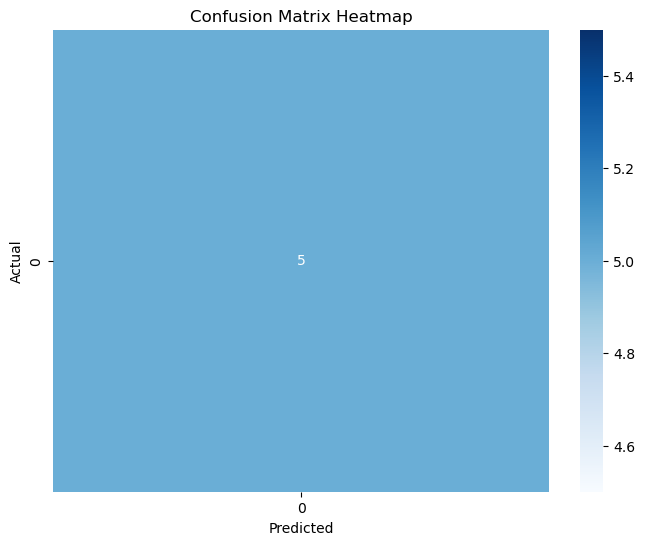

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


In [49]:
from sklearn.neighbors import KNeighborsClassifier

# Using Euclidean distance (default)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Using Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')


In [51]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

In [52]:
k_range = range(1, 21)
cv_scores = []

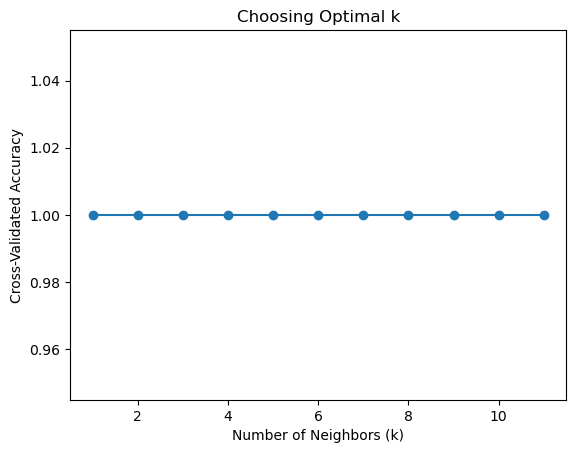

In [54]:
# Plot accuracy vs k
plt.plot(k_range, cv_scores, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Choosing Optimal k")
plt.show()

In [55]:
best_k = k_range[np.argmax(cv_scores)]
print("Best k:", best_k)

Best k: 12


In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [59]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (14, 16)
y_train shape: (14,)
X_test shape: (7, 16)
y_test shape: (7,)


In [60]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your full dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # optional if multiple classes
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(16, 16) (16,)
(5, 16) (5,)


In [62]:
# Accuracy
accuracy = accuracy_score(y_test, y_test_pred)

# Precision, Recall, F1-score (macro average for multi-class)
precision = precision_score(y_test, y_test_pred, average='macro')
recall = recall_score(y_test, y_test_pred, average='macro')
f1 = f1_score(y_test, y_test_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [63]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))



Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [68]:
# Example: choose 'hair' and 'milk' features for 2D visualization
X_plot = X[['hair', 'milk']]
y_plot = y


In [69]:
from sklearn.neighbors import KNeighborsClassifier

knn_plot = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_plot.fit(X_plot, y_plot)


KNeighborsClassifier(metric='euclidean')

In [70]:
import numpy as np

# Create grid of points
x_min, x_max = X_plot['hair'].min() - 1, X_plot['hair'].max() + 1
y_min, y_max = X_plot['milk'].min() - 1, X_plot['milk'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


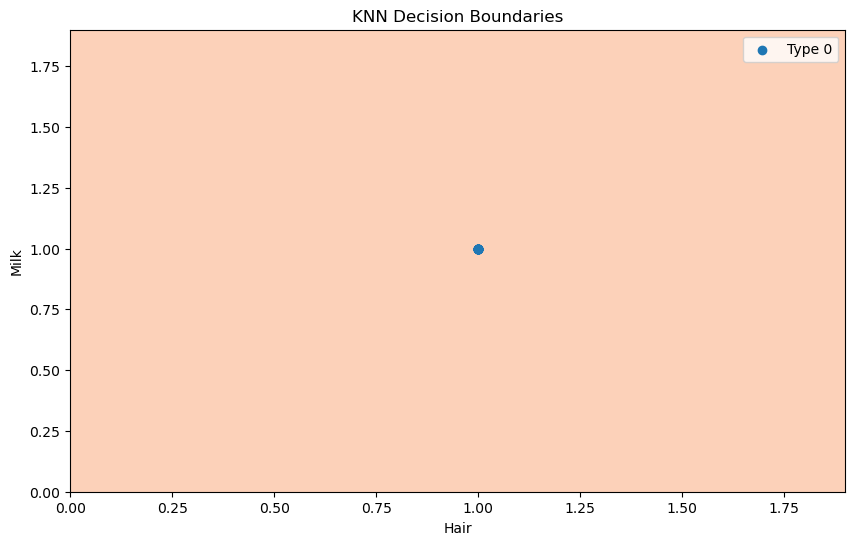

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

# Plot original points
for label in np.unique(y_plot):
    plt.scatter(
        X_plot[y_plot==label]['hair'],
        X_plot[y_plot==label]['milk'],
        label=f"Type {label}"
    )

plt.xlabel('Hair')
plt.ylabel('Milk')
plt.title('KNN Decision Boundaries')
plt.legend()
plt.show()



INTERVIEW QUESTION:
1. What are the key hyperparameters in KNN?

KNN (K-Nearest Neighbors) has several important hyperparameters that control its behavior and performance:

n_neighbors (k):

Number of nearest neighbors to consider for classification or regression.

Small k → sensitive to noise, may overfit.

Large k → smoother decision boundary, may underfit.

weights:

Determines how neighbors contribute to the prediction.

Common options:
'uniform' → all neighbors have equal weight.

'distance' → closer neighbors have higher influence.

metric:

The distance metric used to compute neighbors (e.g., Euclidean, Manhattan, Minkowski).

algorithm:

Method used to compute nearest neighbors: 'auto', 'ball_tree', 'kd_tree', 'brute'.

Affects speed but not prediction accuracy.

p (for Minkowski metric):

Power parameter for the Minkowski distance.

p=1 → Manhattan distance

p=2 → Euclidean distance

leaf_size:

For tree-based algorithms (kd_tree, ball_tree).

Affects speed of neighbor searches.

2. What distance metrics can be used in KNN?

KNN relies on measuring “closeness” between data points. Common distance metrics include:

Euclidean distance (L2 norm):

Standard straight-line distance in n-dimensional space.

Most widely used for continuous numeric features.

Manhattan distance (L1 norm):

Sum of absolute differences along each feature.

Useful for high-dimensional or grid-like data.

Minkowski distance:

Generalization of Euclidean and Manhattan distances.

p=1 → Manhattan, p=2 → Euclidean, other p values are possible.
Chebyshev distance:

Maximum difference along any dimension.

Hamming distance:

Used for categorical or binary features.

Counts the number of positions where the values differ.